# Lab 3

In [115]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
#Loading the titanic dataset from Lab 2
url = "data/Titanic_Cleaned.csv"
df = pd.read_csv(url, sep=',')

### 1. Split the dataset 
We need to split the dataset into two parts:


* Training Set (df_train): Contains passengers with known 'Survived' values.
* Test Set (df_test): Contains passengers with missing 'Survived' values.


In [116]:
#testset with missing survived values
df_test = df[df['Survived'].isna()].copy()
#training set with known survived values
df_train = df.dropna(subset="Survived").copy()

df_test.to_csv('test_set.csv', index=False)
df_train.to_csv('training_set.csv', index=False)
df_train.tail(3)

,PassengerId,Survived,Pclass,SibSp,Parch,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
888,889,0.0,3,1,2,1,2,0,0,1,1,0,0,0
889,890,1.0,1,0,0,1,2,1,0,0,0,1,0,0
890,891,0.0,3,0,0,2,0,1,1,0,0,1,0,0


### 2. Create a new feature 'TravelAlone'

Columns SibSp and Parch are related to traveling with family. 

In [117]:
# using np.where()
df_train.loc[:, 'TravelAlone'] = np.where((df_train['SibSp'] + df_train['Parch']) > 0, 0, 1)
# or using boolean check
#df_train['TravelAlone'] = ((df_train['SibSp'] + df_train['Parch']) == 0).astype(int)
#Dropping SibSp and Parch since they are no longer needed
df_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'CatAge', 'CatFare', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Unique', 'TravelAlone'],
      dtype='object')

### 3. Explore the Data

1. Visualize the impact of age categories on survival using a density plot.
2. Analyze other features such as 'Fare', 'Pclass', 'Sex', and 'TravelAlone'.
3. Interpret the plots and write down your observations.

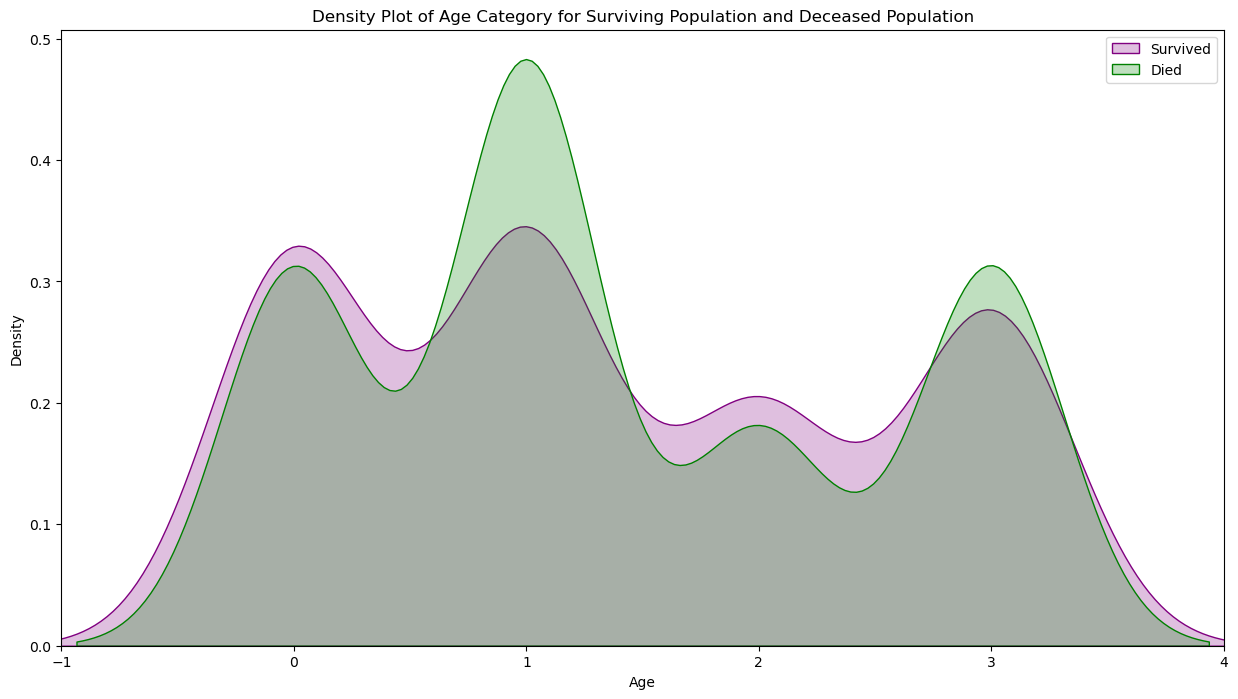

In [118]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="purple", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="green", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()

Younger people from category 0 and 1 survived the most, but cat 1 had the biggest death rate aswell.

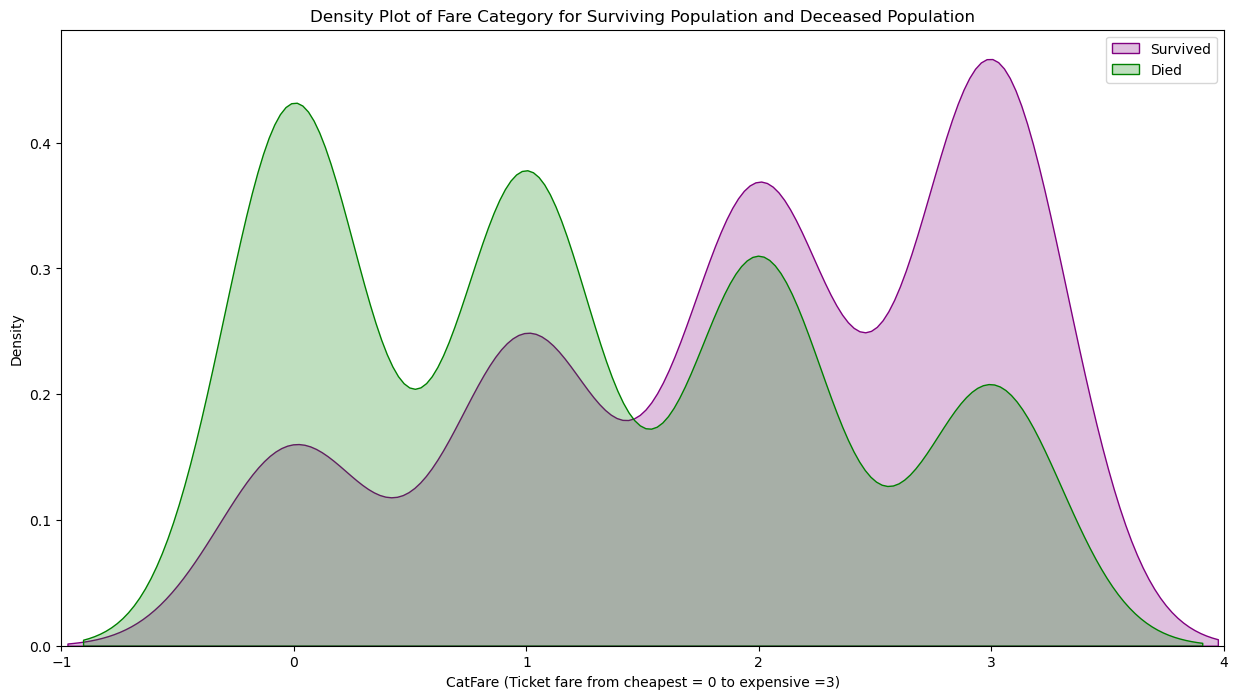

In [119]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="purple", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="green", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare Category for Surviving Population and Deceased Population')
ax.set(xlabel='CatFare (Ticket fare from cheapest = 0 to expensive =3)')
plt.xlim(-1,4)
plt.show()

Passenger who paid for lower fare appear to have a higher death rate, this makes sense considering they were on the lower decks

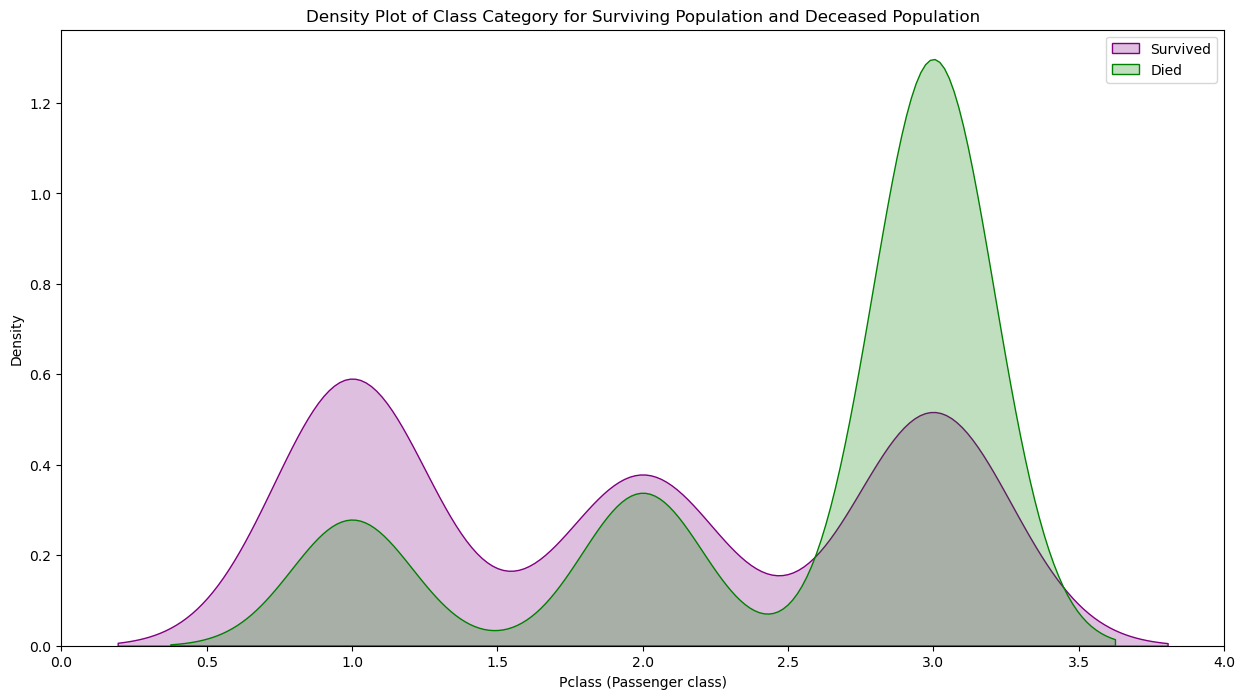

In [120]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="purple", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="green", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Class Category for Surviving Population and Deceased Population')
ax.set(xlabel='Pclass (Passenger class)')
plt.xlim(0,4)
plt.show()

If you were 1st class, you had a higher likelehood to survive. A majority of 3rd class passengers died.

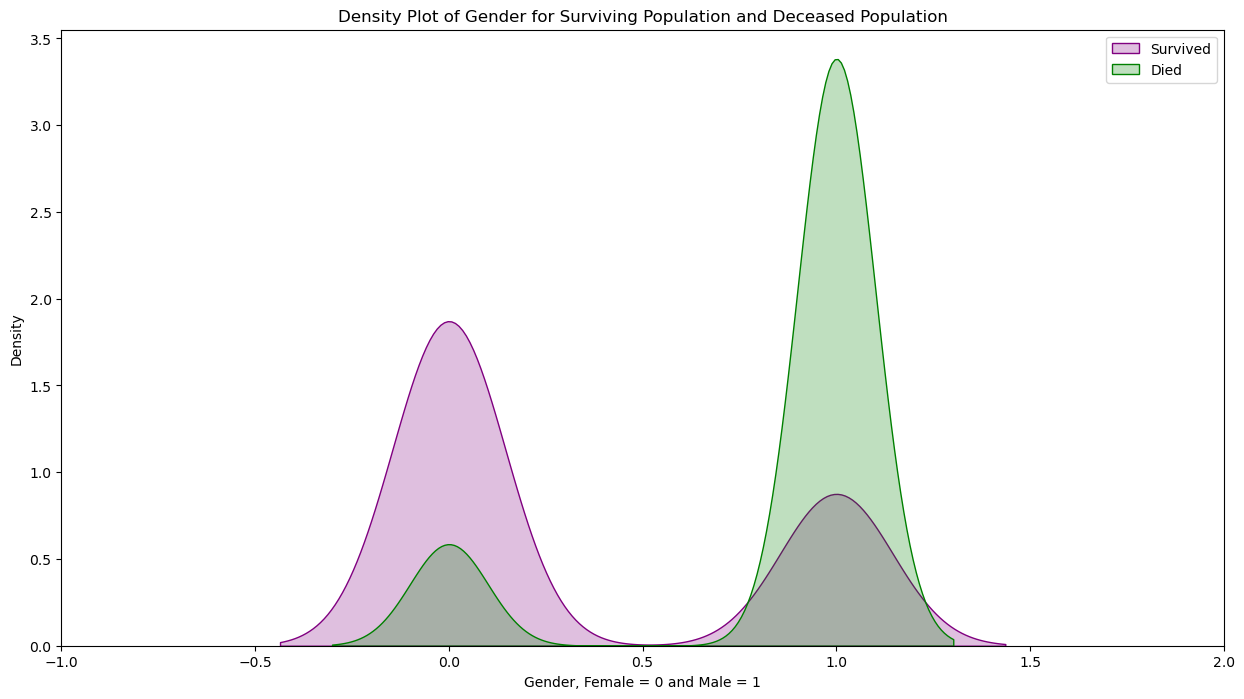

In [121]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="purple", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="green", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Gender for Surviving Population and Deceased Population')
ax.set(xlabel='Gender, Female = 0 and Male = 1')
plt.xlim(-1,2)
plt.show()

It is clear that saving women and children was the priority.

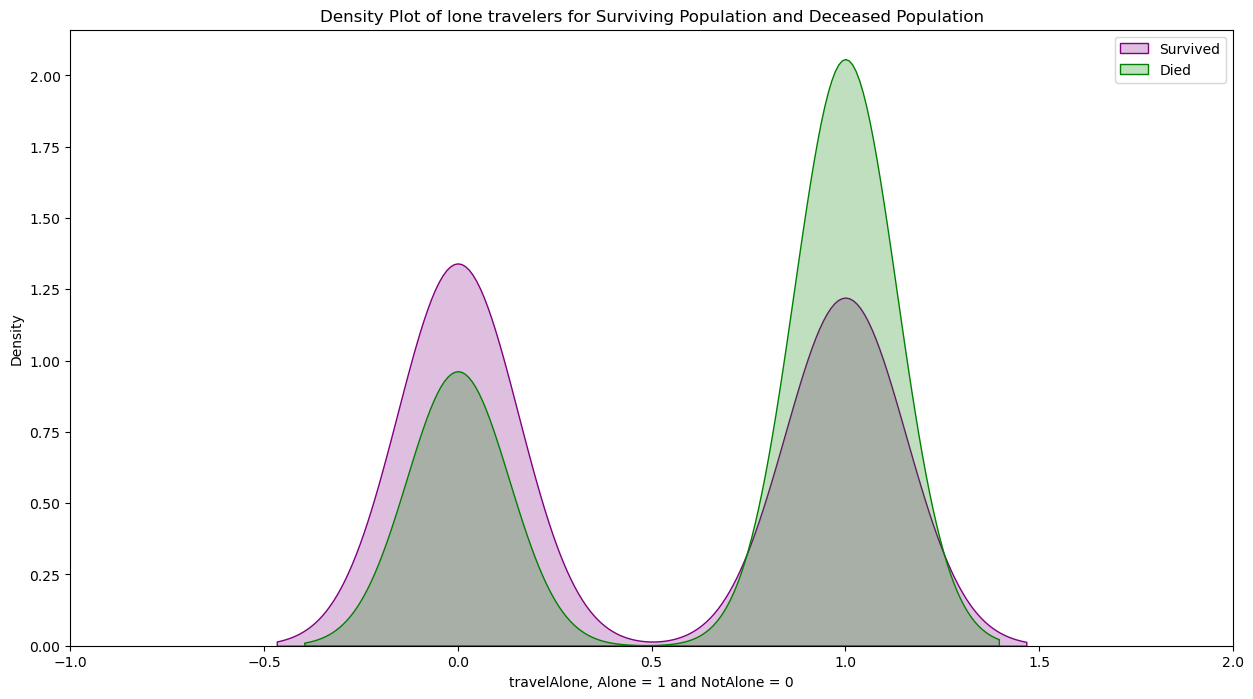

In [122]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="purple", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="green", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of lone travelers for Surviving Population and Deceased Population')
ax.set(xlabel='travelAlone, Alone = 1 and NotAlone = 0')
plt.xlim(-1,2)
plt.show()

Those travelling alone died at a higher rate.

### 4. Compute the Correlation Matrix

Understanding the correlation between features can help in feature selection.

**Instructions:**

1. Compute the correlation matrix for df_train.
2. Visualize the correlation matrix using a heatmap.
3. Analyze the correlations and identify any strong relationships.

* Positive correlation: When one goes up, the other goes up too (e.g., the more you study, the better your grades).
* Negative correlation: When one goes up, the other goes down (e.g., the more you exercise, the lower your weight might be).
* No correlation: No clear relationship between the two (e.g., shoe size and intelligence).

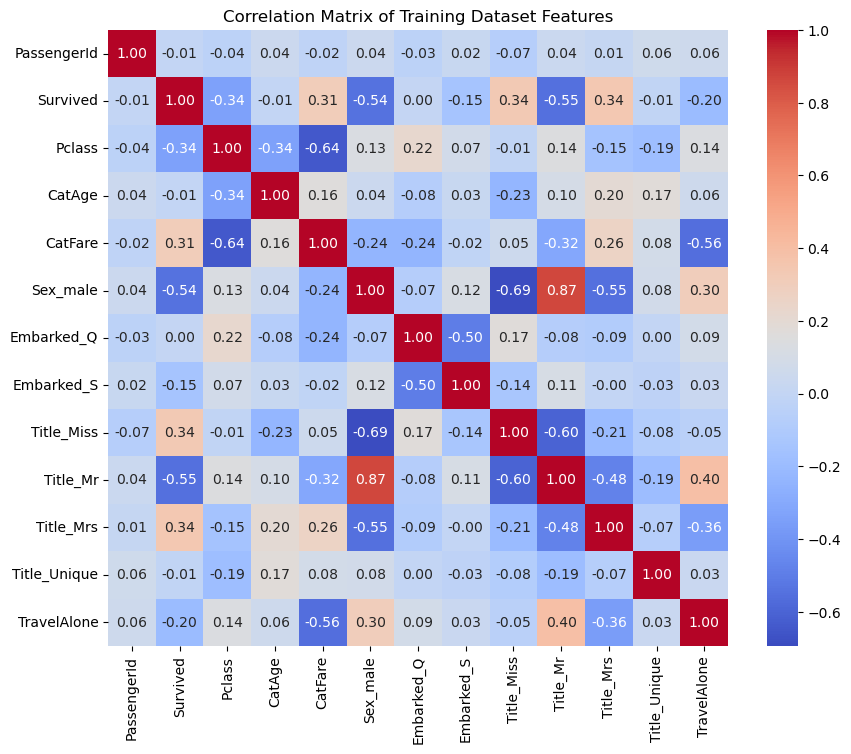

In [123]:
# Compute correlation matrix
correlation_matrix = df_train.corr()

#Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()

Survived has the highest negative correlation with the male sex and having the title Mr, while theres a semi-high positive correlation with survived and the title Mrs, Miss and Having a higher fare category